In [27]:
import os
import sys
from pathlib import Path

# Notebook is in fraud_pipeline/notebooks, so project root is one level up
PROJECT_ROOT = Path.cwd().parents[0]
sys.path.append(str(PROJECT_ROOT))

print("Project root:", PROJECT_ROOT)
print("Python path includes:", PROJECT_ROOT)


Project root: /Users/nithinchaganty/fraud_pipeline
Python path includes: /Users/nithinchaganty/fraud_pipeline


In [28]:
import os
import sys
from pathlib import Path

# Find the project root (folder containing src/)
PROJECT_ROOT = Path(os.getcwd()).resolve().parents[0]
sys.path.append(str(PROJECT_ROOT / "src"))

print("Project root:", PROJECT_ROOT)
print("Python path now includes:", PROJECT_ROOT / "src")


Project root: /Users/nithinchaganty/fraud_pipeline
Python path now includes: /Users/nithinchaganty/fraud_pipeline/src


In [29]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    f1_score,
    precision_score,
    recall_score,
)

import joblib

# Set base directory so we can import src modules
BASE_DIR = Path(os.getcwd()).resolve().parents[0] if Path(os.getcwd()).name == "notebooks" else Path(os.getcwd())
print("Base directory:", BASE_DIR)

sys.path.append(str(BASE_DIR / "src"))


Base directory: /Users/nithinchaganty/fraud_pipeline


In [30]:
from src.config import TEST_SIZE, RANDOM_STATE
from src.data import load_raw_data
from src.features import build_features_and_target

df = load_raw_data()
X, y = build_features_and_target(df)

X.shape, y.shape

((284807, 30), (284807,))

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    shuffle=False,
)

X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [32]:
models_dir = BASE_DIR / "models"

model = joblib.load(models_dir / "best_model.pkl")
feature_cols = joblib.load(models_dir / "feature_cols.pkl")
best_threshold = float(joblib.load(models_dir / "best_threshold.pkl"))

feature_cols[:5], best_threshold

(['V1', 'V2', 'V3', 'V4', 'V5'], 0.9500000000000001)

In [33]:
X_test_model = X_test[feature_cols]

proba = model.predict_proba(X_test_model)[:, 1]
y_pred = (proba > best_threshold).astype(int)

print("F1:", f1_score(y_test, y_pred, zero_division=0))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))

F1: 0.8235294117647058
Precision: 0.9180327868852459
Recall: 0.7466666666666667


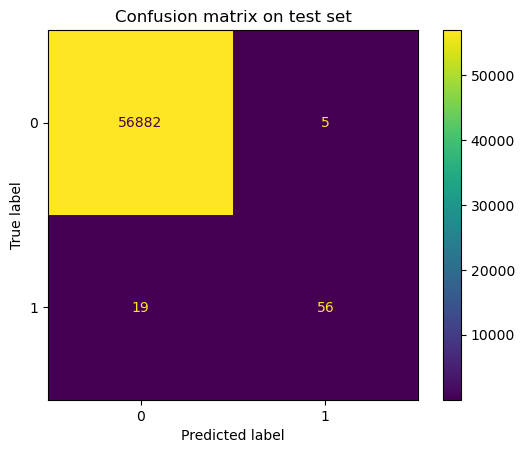

In [34]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(values_format="d")
plt.title("Confusion matrix on test set")
plt.show()

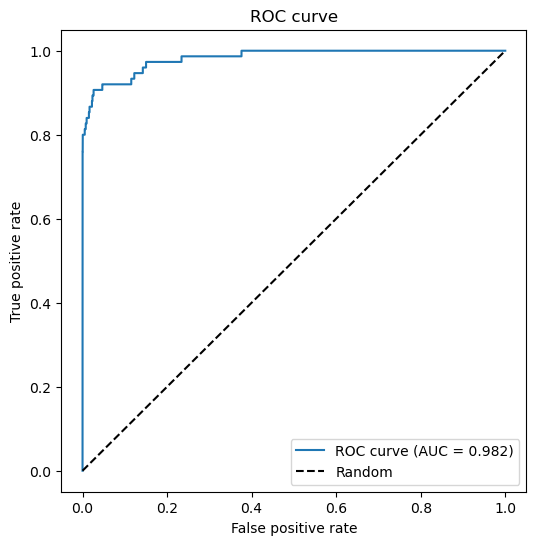

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="lower right")
plt.show()

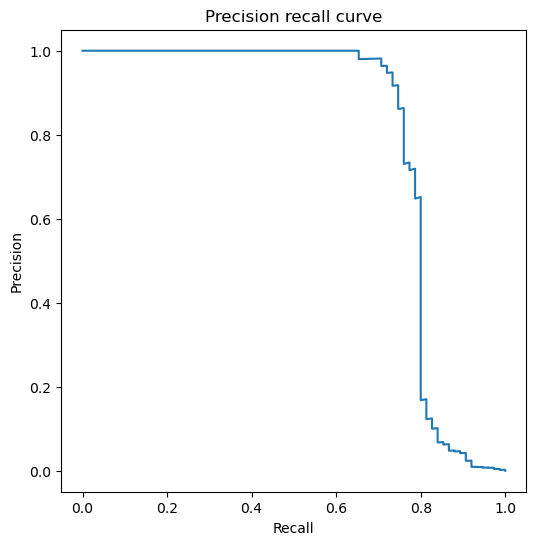

In [36]:
precisions, recalls, pr_thresholds = precision_recall_curve(y_test, proba)
plt.figure(figsize=(6, 6))
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision recall curve")
plt.show()

In [37]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56887
           1     0.9180    0.7467    0.8235        75

    accuracy                         0.9996     56962
   macro avg     0.9588    0.8733    0.9117     56962
weighted avg     0.9996    0.9996    0.9996     56962



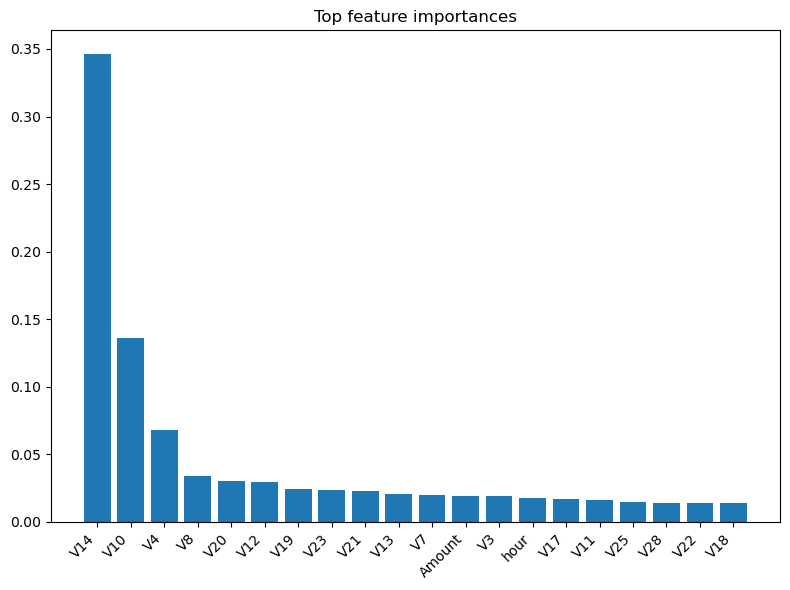

In [26]:
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    idx = np.argsort(importances)[::-1][:20]  # top 20

    plt.figure(figsize=(8, 6))
    plt.bar(range(len(idx)), importances[idx])
    plt.xticks(range(len(idx)), np.array(feature_cols)[idx], rotation=45, ha="right")
    plt.title("Top feature importances")
    plt.tight_layout()
    plt.show()
else:
    print("This model does not expose feature_importances_.")